In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

style_file = os.path.expandvars('$I3_SRC/LeptonInjector/python/hnl_mpl_plotstyle.mplstyle')
plt.style.use('../ultrasurfaces_plotstyle.mplstyle')

Check event generation

In [2]:
from generator import Response

In [3]:
from generator import OscPars

In [4]:
from generator import Generator

# Histograms

In [5]:
bin_edges = np.logspace(1., 2., 26)

Re-weighting to a different set of oscillation parameters

In [6]:
response = Response(1.1, 0.1)

In [7]:
gen = Generator(int(1e5), response)

h0 = gen.get_histogram(bin_edges)
hist0, hist0_unc = h0['hist'], h0['hist_unc']

# new osc params
delta_msq_31 = 2.495e-3
sinsq_theta_23 = 0.575
# convert this to sin**2(2 \theta)
theta_23 = np.arcsin(np.sqrt(sinsq_theta_23))
sinsq_2theta_23 = np.sin(2 * theta_23)**2
new_osc_pars = OscPars(theta_23, sinsq_2theta_23)

gen.reweight_oscillation(new_osc_pars)

h = gen.get_histogram(bin_edges)
hist, hist_unc = h['hist'], h['hist_unc']
gen2 = Generator(int(1e5), response, new_osc_pars)
h2 = gen2.get_histogram(bin_edges)
hist2, hist2_unc = h2['hist'], h2['hist_unc']

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


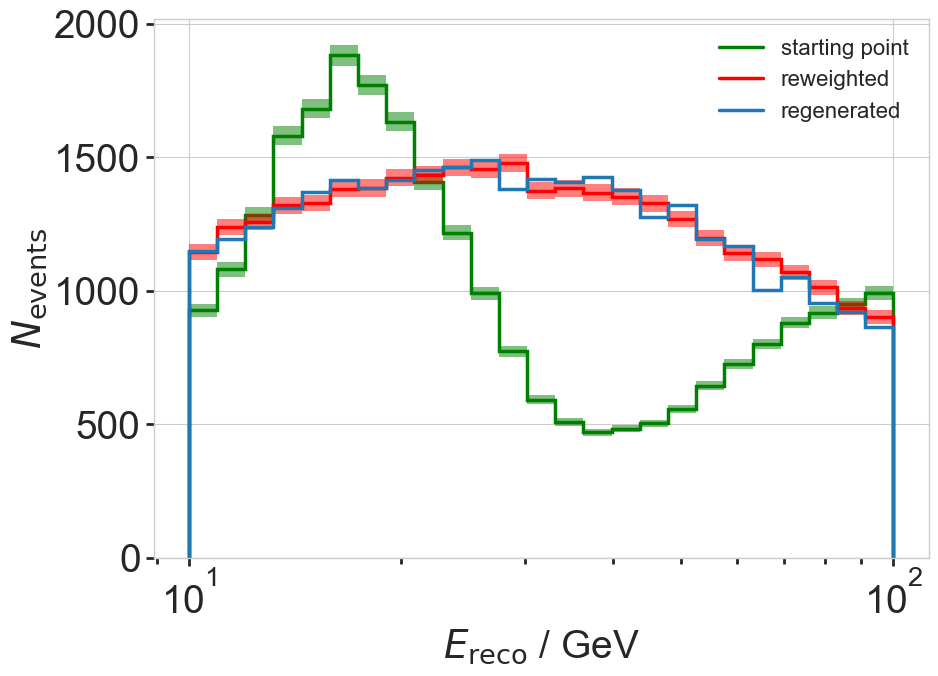

In [8]:
# first and last bin are overflow bins in hist

plt.stairs(hist0[1:-1], bin_edges, label='starting point', color='g', lw=2.5)
plt.stairs(hist0[1:-1]+hist0_unc[1:-1], bin_edges,
    baseline=hist0[1:-1]-hist0_unc[1:-1], fill=True,
    color='g', alpha=0.5)

plt.stairs(hist[1:-1], bin_edges, label='reweighted', color='r', lw=2.5)
plt.stairs(hist[1:-1]+hist_unc[1:-1], bin_edges,
    baseline=hist[1:-1]-hist_unc[1:-1], fill=True,
    color='r', alpha=0.5)
plt.stairs(hist2[1:-1], bin_edges, label='regenerated', lw=2.5)
plt.xscale('log')
plt.xlabel(r'$E_{\rm reco}$ / GeV')
plt.ylabel(r'$N_{\rm events}$')

plt.legend()

Re-weighting to a different detector response

In [9]:
response = Response(1.1, 0.1)
response_intermed = Response(2., 0.2)
response2 = Response(0.9, 0.05)


gen = Generator(int(1e5), response)
h0 = gen.get_histogram(bin_edges)
hist0, hist0_unc = h0['hist'], h0['hist_unc']

# test intermediate reweighting, to make sure bookkeeping works multiple times
gen.reweight_detector_response(response_intermed)
# now go to final response
gen.reweight_detector_response(response2)

h = gen.get_histogram(bin_edges)
hist, hist_unc = h['hist'], h['hist_unc']


response2 = Response(0.9, 0.05)
gen2 = Generator(int(1e5), response2)
h2 = gen2.get_histogram(bin_edges)
hist2, hist2_unc = h2['hist'], h2['hist_unc']

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


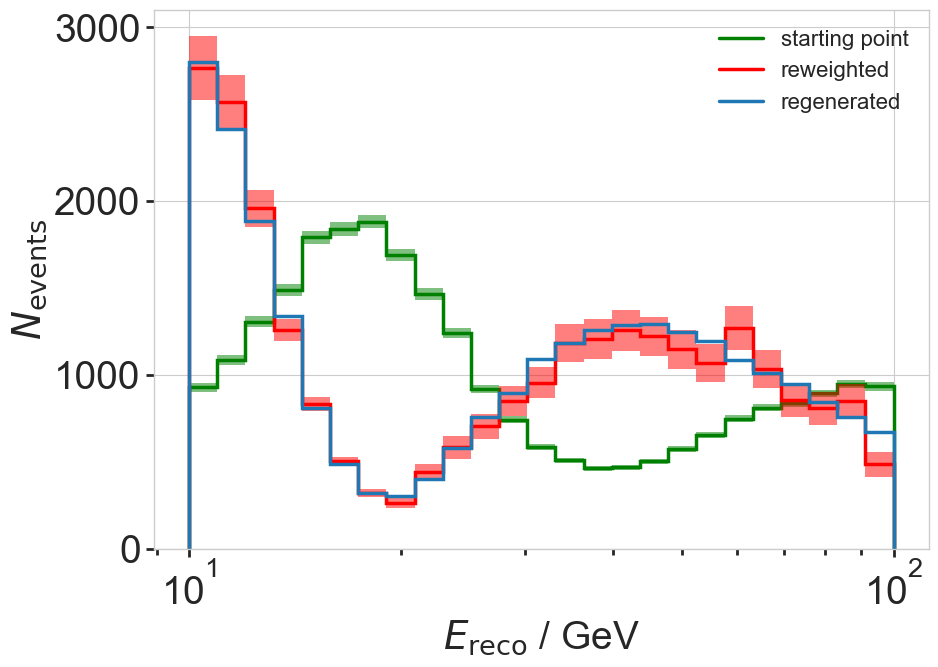

In [10]:
# first and last bin are overflow bins in hist

plt.stairs(hist0[1:-1], bin_edges, label='starting point', color='g', lw=2.5)
plt.stairs(hist0[1:-1]+hist0_unc[1:-1], bin_edges,
    baseline=hist0[1:-1]-hist0_unc[1:-1], fill=True,
    color='g', alpha=0.5)

plt.stairs(hist[1:-1], bin_edges, label='reweighted', color='r', lw=2.5)
plt.stairs(hist[1:-1]+hist_unc[1:-1], bin_edges,
    baseline=hist[1:-1]-hist_unc[1:-1], fill=True,
    color='r', alpha=0.5)
plt.stairs(hist2[1:-1], bin_edges, label='regenerated', lw=2.5)
plt.xscale('log')
plt.xlabel(r'$E_{\rm reco}$ / GeV')
plt.ylabel(r'$N_{\rm events}$')

plt.legend()